# Question 4
## Decision Tree


### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


### Train data

In [2]:
data = {
    'Alt': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Bar': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Fri': ['No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Hun': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Pat': ['Some', 'Full', 'Some', 'Full', 'Full', 'Some', 'None', 'Some', 'Full', 'Full', 'None', 'Full'],
    'Price': ['High', 'Low', 'Low', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'High', 'Low', 'Low'],
    'Rain': ['No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Res': ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'Type': ['French', 'Thai', 'Burger', 'Thai', 'French', 'Italian', 'Burger', 'Thai', 'Burger', 'Italian', 'Thai', 'Burger'],
    'Est': ['0-10', '30-60', '0-10', '10-30', '>60', '0-10', '0-10', '0-10', '0-10', '>60', '10-30', '0-10'],
    'Wait': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']
}

df = pd.DataFrame(data)



#### Calculate the entropy of Target

In [3]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

target_entropy = entropy(df['Wait'])
print("Entropy of Wait:", target_entropy)


Entropy of Wait: 1.0


In [4]:
def feature_entropy(df, feature):
    elements, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(df.where(df[feature]==elements[i]).dropna()['Wait']) for i in range(len(elements))])
    return weighted_entropy

def information_gain(df, feature):
    return target_entropy - feature_entropy(df, feature)


#### Calculate information gain for each feature

In [5]:
features = df.columns[:-1]  # Exclude the target variable
info_gains = {feature: information_gain(df, feature) for feature in features}

print("Information Gain for each feature:")
for feature, gain in info_gains.items():
    print(f"{feature}: {gain}")

Information Gain for each feature:
Alt: 0.0
Bar: 0.0
Fri: 0.020720839623908027
Hun: 0.19570962879973086
Pat: 0.5408520829727552
Price: 0.19570962879973086
Rain: 0.020720839623908027
Res: 0.020720839623908027
Type: 0.0
Est: 0.3298463350027986


#### Choose the feature with max Information Gain

In [6]:
best_feature = max(info_gains, key=info_gains.get)
print("Best Feature to split on:", best_feature)


Best Feature to split on: Pat


#### Now we build the next layers like before with a recursive function. The result is a dictionory which is our decision tree.

In [7]:
def best_feature_to_split(df, features):
    info_gains = {feature: information_gain(df, feature) for feature in features}
    return max(info_gains, key=info_gains.get)

def build_tree(df, features, target='Wait'):
    if len(np.unique(df[target])) == 1:
        return np.unique(df[target])[0]

    elif len(features) == 0:
        return df[target].mode()[0]

    else:
        best_feature = best_feature_to_split(df, features)
        tree = {best_feature: {}}
        features = [feat for feat in features if feat != best_feature]

        for value in np.unique(df[best_feature]):
            sub_data = df.where(df[best_feature] == value).dropna()
            subtree = build_tree(sub_data, features, target)
            tree[best_feature][value] = subtree

        return tree

features = df.columns[:-1]
decision_tree = build_tree(df, features)
print("Decision Tree:", decision_tree)


Decision Tree: {'Pat': {'Full': {'Est': {'0-10': {'Alt': {'No': 'No', 'Yes': 'Yes'}}, '10-30': 'Yes', '30-60': 'No', '>60': 'No'}}, 'None': 'No', 'Some': 'Yes'}}


#### With the help of library function we can get a better visualization and check for our tree.

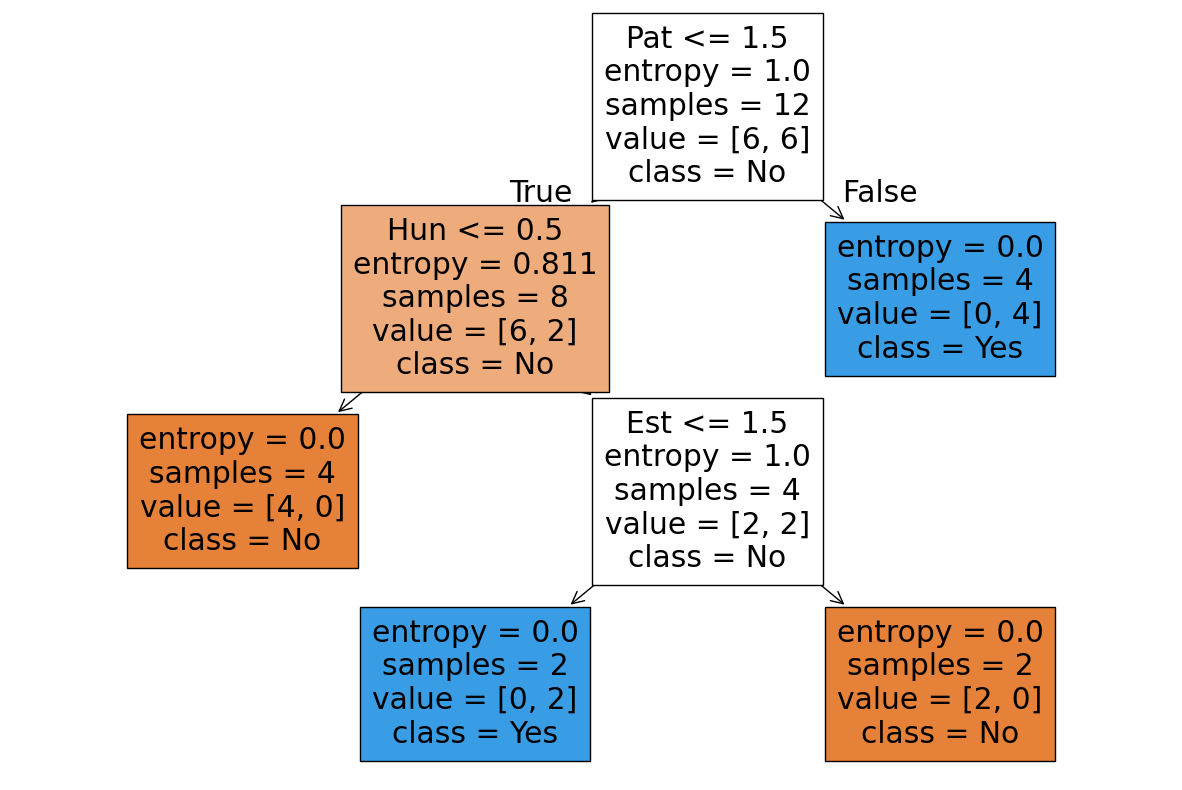

In [8]:
for column in df.columns:
    df[column] = df[column].astype('category').cat.codes

X = df.drop('Wait', axis=1)
y = df['Wait']

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


#### Explanation of the decision tree:
This decision tree is responsible for predicting flower types(versicolor, virginica, setosa).
The first layer has the feature **petal lenght** and the threshold is 2.45 . The next two layer are the same feature with threshold 1.75 , 4.95 and 4.85. In the next layer there is another feature called **sepal lenght** with threshold 6.95. <br>
There is also the term 'gini' . Gini impurity is a metric used to measure the "impurity" or "homogeneity" of a dataset in the context of decision trees. It is one of the criteria that can be used to decide how to split nodes in the tree, helping to create the most homogeneous branches.
<br>
Overall It is a decision tree with depth 6 for prediction of flower types.  